In [1]:
import tomographer
# Give us a nice progress bar
import tomographer.jpyutil
# Analyze the output and get quantum error bars
import tomographer.querrorbars

In [2]:
#import logging
#tomographer.cxxlogger.level = logging.NOTSET # slow things down a bit, to test for progress

In [3]:
import numpy as np

Nm = np.array([ 490, 510, 494, 506, 980, 20 ])

Emn = [
    # X direction
    np.array([[1, 1],
              [1, 1]]),
    np.array([[1, -1],
              [-1, 1]]),
    # Y direction
    np.array([[1, -1j],
              [1j, 1]]),
    np.array([[1, 1j],
              [-1j, 1]]),
    # Z direction
    np.array([[1, 0],
              [0, 0]]),
    np.array([[0, 0],
              [0, 1]]),
    ]

rho_ref = np.array([[1,0],[0,0]])

r = None
with tomographer.jpyutil.RandWalkProgressBar("Running random walks for the tomography procedure ... ") as prg:
    r = tomographer.tomorun.tomorun(dim=2, Nm=Nm, Emn=Emn,
                                    hist_params=tomographer.UniformBinsHistogramParams(0.9,1,50),
                                    mhrw_params=tomographer.MHRWParams(0.025,40,500,32768),
                                    fig_of_merit="obs-value",
                                    num_repeats=4,
                                    observable=rho_ref,
                                    progress_fn=prg.progress_fn)
    prg.displayFinalInfo(r['final_report_runs'])
#print(repr(r))
#print(r['final_histogram'].prettyPrint(100))
#print(r['final_report'])


In [4]:
print(r['final_histogram'].params.min, r['final_histogram'].params.max, r['final_histogram'].params.num_bins)
print(r['final_histogram'].values_center, "\n", r['final_histogram'].bins, "\n", r['final_histogram'].delta)

0.9 1.0 50
[ 0.901  0.903  0.905  0.907  0.909  0.911  0.913  0.915  0.917  0.919
  0.921  0.923  0.925  0.927  0.929  0.931  0.933  0.935  0.937  0.939
  0.941  0.943  0.945  0.947  0.949  0.951  0.953  0.955  0.957  0.959
  0.961  0.963  0.965  0.967  0.969  0.971  0.973  0.975  0.977  0.979
  0.981  0.983  0.985  0.987  0.989  0.991  0.993  0.995  0.997  0.999] 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.52587891e-05
   7.62939453e-05   1.67846680e-04   6.56127930e-04   1.51062012e-03
   4.03594971e-03   8.50677490e-03   1.83563232e-02   3.65829468e-02
   6.53686

Fit Parameters:
	a2 = 512.7
	a1 = 959.6
	 m = 19.59
	 c = 94.32

Quantum Error Bars:
	   f0 = 0.98
	Delta = 0.006321
	gamma = 0.0006526



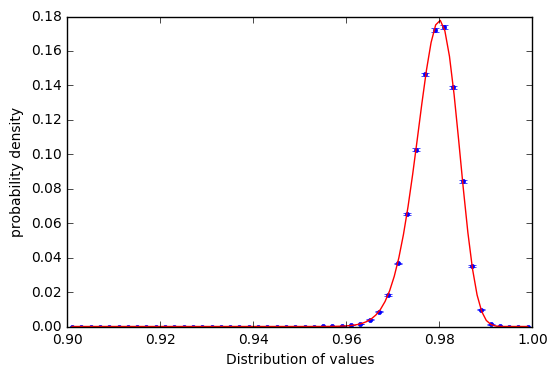

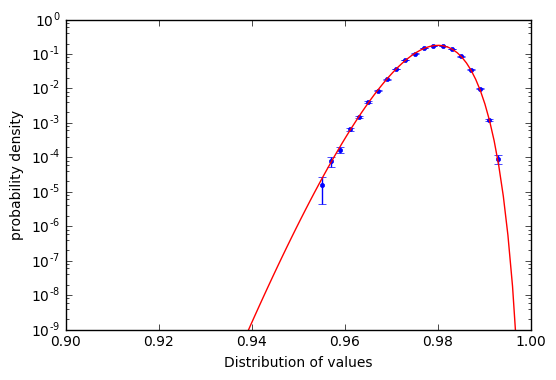

In [5]:
# Do the analysis.

analysis = tomographer.querrorbars.HistogramAnalysis(r['final_histogram'], ftox=(1,-1))

# display fit paramters
fitparams = analysis.fitParameters()
print("Fit Parameters:\n\ta2 = {a2:.4g}\n\ta1 = {a1:.4g}\n\t m = {m:.4g}\n\t c = {c:.4g}\n".format(**fitparams._asdict()))

# display the quantum error bars (f0, Delta, gamma)
q = analysis.quantumErrorBars()
print("Quantum Error Bars:\n\t   f0 = {f0:.4g}\n\tDelta = {Delta:.4g}\n\tgamma = {gamma:.4g}\n".format(**q._asdict()))

# show some plots
p1 = analysis.plot() # linear scale

p2 = analysis.plot(log_scale=True, show_plot=False) # log scale
p2.ax.set_ylim([1e-9,1])
p2.show()